<a href="https://colab.research.google.com/github/Jashwanth-rit/Machine-learning---Hands-on/blob/main/Deep_learning_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
2+2


4

In [5]:
import torch
import numpy as np


In [3]:
tensor_2d =  torch.randn(3,4)
tensor_2d

tensor([[-0.7265, -0.5975, -0.4915,  0.9811],
        [-0.2670,  0.9754,  0.5083, -0.8347],
        [-0.6343, -0.6600, -0.3614,  1.3351]])

Basically , after importing torch just apply all the function of numpy to torch ,
other thing is tensor is one step farward of numpy , we can manipulate arrays effectively than the numpy ,

 so the cunclusion is Arraylist > Numpy > Tensor .

In [4]:
tensor_3d =  torch.randn(2,3,4)
tensor_3d

tensor([[[-0.7632, -0.6061,  0.4601, -1.4232],
         [ 0.5530, -0.7686,  0.7916,  0.3047],
         [ 0.9000,  0.0254, -0.5892,  0.3770]],

        [[ 0.5969, -1.3685, -1.4988,  1.8397],
         [ 1.3459, -0.7205, -0.0276, -1.8734],
         [ 0.4746,  0.3002,  0.0289, -1.0282]]])

In [9]:
np1 = np.random.rand(3,4)
np1

tensor_d =  torch.tensor(np1)
tensor_d

tensor([[0.3365, 0.1560, 0.5804, 0.2658],
        [0.5667, 0.2564, 0.7045, 0.6131],
        [0.7158, 0.0594, 0.7649, 0.4315]], dtype=torch.float64)

In [10]:
# operations on tensor

tensor_1 = tensor_d.reshape(12)
tensor_1

tensor([0.3365, 0.1560, 0.5804, 0.2658, 0.5667, 0.2564, 0.7045, 0.6131, 0.7158,
        0.0594, 0.7649, 0.4315], dtype=torch.float64)

In [11]:
tensor_2 = tensor_1.view(3,4)
tensor_2

tensor([[0.3365, 0.1560, 0.5804, 0.2658],
        [0.5667, 0.2564, 0.7045, 0.6131],
        [0.7158, 0.0594, 0.7649, 0.4315]], dtype=torch.float64)

Find the diffrence between reshape and view , check it .
I know how access the values by index , and slicing as similar as Numpy

Next is tensor addition, substracton, multiplication, division .
they are all common as Numpy ,
syntax: Var1.sub(var2) or var1 - var2 or torch.sub(var1,var2)

In [2]:
# Create basic neural network model of flower
import torch
import torch.nn as nn
import torch.nn.functional as f


In [3]:
# Creating Class Which consist of neural network


class Model(nn.Module):
    def __init__(self, input_features=4, h1=8, h2=9, output_features=3):
        super(Model, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_features, h1)   # Input layer to first hidden layer
        self.fc2 = nn.Linear(h1, h2)               # First hidden layer to second hidden layer
        self.fc3 = nn.Linear(h2, output_features)  # Second hidden layer to output layer

    def forward(self, x):
        # Define the forward pass
        x = f.relu(self.fc1(x))  # ReLU activation after first layer
        x = f.relu(self.fc2(x))  # ReLU activation after second layer
        x = self.fc3(x)          # Output layer (no activation function here)
        return x





In [4]:
# Pick manual seed for randamisation

torch.manual_seed(41)
# Create an instance
model = Model()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',0.0)
my_df['species'] = my_df['species'].replace('virginica',0.0)

x = my_df.drop('species', axis = 1)
y = my_df['species']

In [8]:
x = x.values
y = y.values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# splitting for test and train
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 41)

In [11]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)


In [12]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [13]:
# finding error
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


# Train our model!
# Epochs? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(x_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.1119104623794556
Epoch: 10 and loss: 0.49496784806251526
Epoch: 20 and loss: 0.039821524173021317
Epoch: 30 and loss: 0.001987617230042815
Epoch: 40 and loss: 0.00036050108610652387
Epoch: 50 and loss: 0.00016613630577921867
Epoch: 60 and loss: 0.00011918490781681612
Epoch: 70 and loss: 0.00010295279207639396
Epoch: 80 and loss: 9.571847476763651e-05
Epoch: 90 and loss: 9.154311555903405e-05


Text(0.5, 0, 'Epoch')

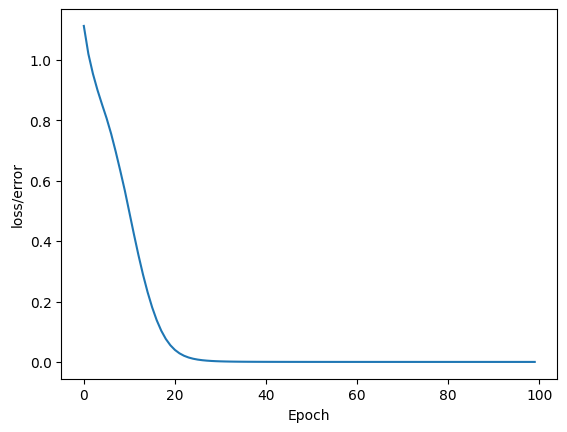

In [14]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [16]:
# Evaluate Model on Test Data Set (validate model on test set)
with torch.no_grad():  # Basically turn off back propogation
  y_eval = model.forward(x_test) # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test) # Find the loss or error


In [17]:

loss

tensor(0.0001)

In [19]:

correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'


    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([ 7.3391, -5.2883, -3.1516]) 	 0 	 0
2.)  tensor([ 8.1191, -5.8881, -3.4755]) 	 0 	 0
3.)  tensor([ 9.1939, -6.7025, -3.9081]) 	 0 	 0
4.)  tensor([ 7.5957, -5.4796, -3.2515]) 	 0 	 0
5.)  tensor([ 8.4336, -6.1241, -3.5995]) 	 0 	 0
6.)  tensor([ 7.3732, -5.3048, -3.1550]) 	 0 	 0
7.)  tensor([ 7.7903, -5.6312, -3.3344]) 	 0 	 0
8.)  tensor([ 7.7205, -5.5762, -3.3039]) 	 0 	 0
9.)  tensor([ 8.1507, -5.9078, -3.4835]) 	 0 	 0
10.)  tensor([ 8.6465, -6.2907, -3.6911]) 	 0 	 0
11.)  tensor([ 7.7732, -5.6197, -3.3292]) 	 0 	 0
12.)  tensor([ 6.1562, -4.3670, -2.6280]) 	 0 	 0
13.)  tensor([ 5.5165, -3.8843, -2.3700]) 	 0 	 0
14.)  tensor([ 6.2465, -4.4473, -2.6971]) 	 0 	 0
15.)  tensor([ 6.2453, -4.4378, -2.6689]) 	 0 	 0
16.)  tensor([ 7.7781, -5.6215, -3.3290]) 	 0 	 0
17.)  tensor([ 5.8564, -4.1374, -2.5151]) 	 0 	 0
18.)  tensor([ 7.5759, -5.4702, -3.2498]) 	 0 	 0
19.)  tensor([ 5.8796, -4.1554, -2.5185]) 	 0 	 0
20.)  tensor([ 5.3721, -3.7817, -2.2997]) 	 0 	 0
21.)  ten

In [20]:
# new data input and check which flower is this

new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [21]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 5.7916, -4.0936, -2.4769])


In [24]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])


with torch.no_grad():
   y_val = model.forward(newer_iris)
   #y_val = model(newer_iris)
   # Will tell us what type of flower class our network thinks it is
   print(f'{y_val.argmax().item()}')

   if y_val.argmax().item() == 0:
      x = "Setosa"
   elif y_val.argmax().item() == 1:
      x = 'Versicolor'
   else:
      x = 'Virginica'

   print(x)

0
Setosa


In [25]:
# Save our NN Model
torch.save(model.state_dict(), 'my_really_awesome_iris_model.pt')


In [26]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))

<ipython-input-26-f4376919f48a>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_really_awesome_iris_model.pt'))


<All keys matched successfully>

In [27]:
# Make sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=3, bias=True)
)